In [61]:
# importing all relevant libraries
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [63]:
# importing and previewing dataset
customer_pb = pd.read_csv('Customer Purchasing Behaviors.csv')
print(customer_pb.head())
print(customer_pb.dtypes)
print(customer_pb.describe())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  
user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object
          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   5

In [65]:
# #Data Cleaning
#checking for potential Duplicates
print(customer_pb.duplicated().value_counts())
# Checking for na values
customer_pb.isnull().sum()

False    238
Name: count, dtype: int64


user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

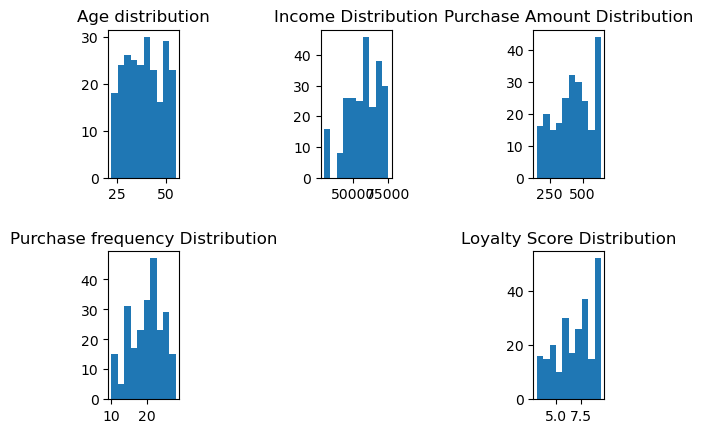

In [67]:
# Visualizing distribution of numeric variables
grid = plt.GridSpec(2,3,wspace=2,hspace=0.5)
axis1 = plt.subplot(grid[0,0])
axis1.hist(customer_pb.age)
axis1.set_title('Age distribution')
axis2 = plt.subplot(grid[0,1:2])
axis2.hist(customer_pb.annual_income)
axis2.set_title('Income Distribution')
axis3 = plt.subplot(grid[0,2])
axis3.hist(customer_pb.purchase_amount)
axis3.set_title('Purchase Amount Distribution')
axis4 = plt.subplot(grid[1,0])
axis4.hist(customer_pb.purchase_frequency)
axis4.set_title('Purchase frequency Distribution')
axis5 = plt.subplot(grid[1,2])
axis5.hist(customer_pb.loyalty_score)
axis5.set_title('Loyalty Score Distribution')
plt.show()

In [69]:
# Distribution of region variable
print(customer_pb.region.value_counts())

region
North    78
South    77
West     77
East      6
Name: count, dtype: int64


   age  annual_income  purchase_amount  purchase_frequency  loyalty_score
0   25          45000              200                  12            4.5
1   34          55000              350                  18            7.0
2   45          65000              500                  22            8.0
3   22          30000              150                  10            3.0
4   29          47000              220                  13            4.8
                         age  annual_income  purchase_amount  \
age                 1.000000       0.974833         0.986140   
annual_income       0.974833       1.000000         0.984208   
purchase_amount     0.986140       0.984208         1.000000   
purchase_frequency  0.980532       0.982920         0.993579   
loyalty_score       0.981835       0.984351         0.994147   

                    purchase_frequency  loyalty_score  
age                           0.980532       0.981835  
annual_income                 0.982920       0.984351  
pur

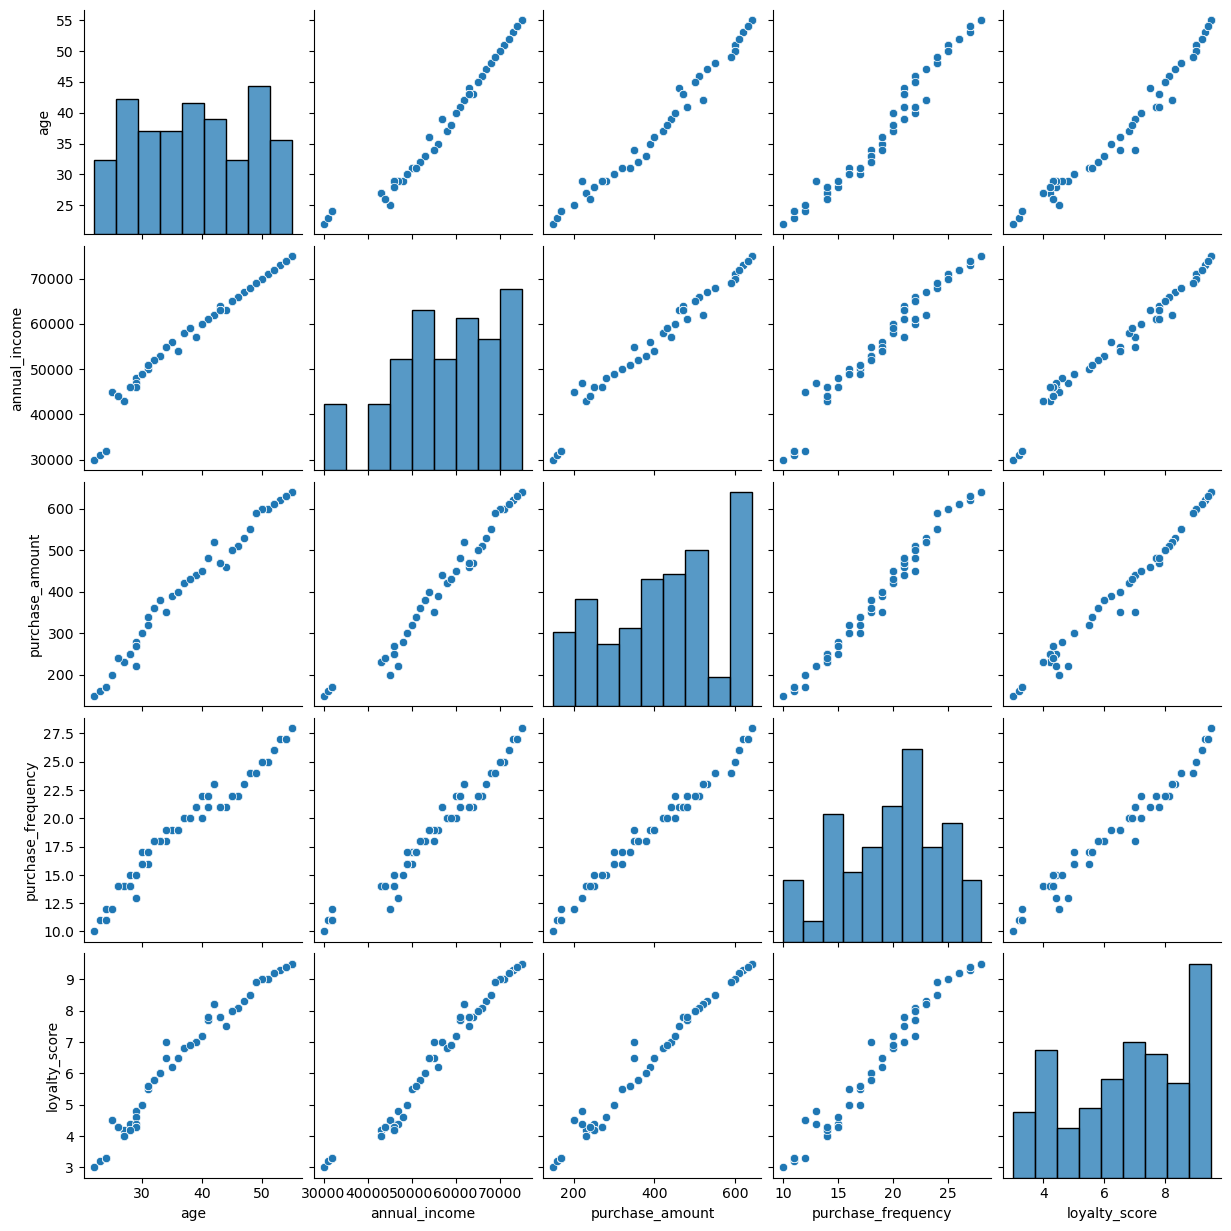

In [71]:
# Checking correlations and significance of correlations
customer_pb_numeric = customer_pb[['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'loyalty_score']]
print(customer_pb_numeric.head())
print(customer_pb_numeric.corr())
def corr_and_pvalue(df, var1, var2):
    corr_value, p_value = stats.pearsonr(df[var1], df[var2])
    print('Correlation between ' + var1 + ' and ' + var2 + ' is ' + str(corr_value) + ' with p value of ' + str(p_value) + '.')

corr_and_pvalue(customer_pb, 'age', 'annual_income')
corr_and_pvalue(customer_pb, 'age', 'purchase_amount')
corr_and_pvalue(customer_pb, 'age', 'purchase_frequency')
corr_and_pvalue(customer_pb, 'age', 'loyalty_score')
corr_and_pvalue(customer_pb, 'annual_income', 'purchase_amount')
corr_and_pvalue(customer_pb, 'annual_income', 'purchase_frequency')
corr_and_pvalue(customer_pb, 'annual_income', 'loyalty_score')
corr_and_pvalue(customer_pb, 'purchase_amount', 'purchase_frequency')
corr_and_pvalue(customer_pb, 'purchase_amount', 'loyalty_score')
corr_and_pvalue(customer_pb, 'purchase_frequency', 'loyalty_score')

sns.pairplot(customer_pb_numeric)
plt.show()

In [72]:
# Anova to check significant relationships with Region
def anova_with_region(var_list):
    east_table = customer_pb[customer_pb.region == 'East']
    west_table = customer_pb[customer_pb.region == 'West']
    south_table = customer_pb[customer_pb.region == 'South']
    north_table = customer_pb[customer_pb.region == 'North']
    for var in var_list:
        f_val, p_val = stats.f_oneway(east_table[var], west_table[var], south_table[var], north_table[var])
        print('P value between Region and ' + var + ' is ' + str(p_val) + '.')
        east_mean = np.average(east_table[var])
        print('Average ' + var + ' for East region is ' + str(east_mean) + '.')
        west_mean = np.average(west_table[var])
        print('Average ' + var + ' for West region is ' + str(west_mean) + '.')
        south_mean = np.average(south_table[var])
        print('Average ' + var + ' for South region is ' + str(south_mean) + '.')
        north_mean = np.average(north_table[var])
        print('Average ' + var + ' for North region is ' + str(north_mean) + '.')

anova_with_region(['annual_income', 'purchase_amount', 'purchase_frequency', 'loyalty_score'])

P value between Region and annual_income is 3.441803170060351e-10.
Average annual_income for East region is 49000.0.
Average annual_income for West region is 64129.87012987013.
Average annual_income for South region is 55766.23376623377.
Average annual_income for North region is 53038.46153846154.
P value between Region and purchase_amount is 5.62452595746722e-12.
Average purchase_amount for East region is 320.0.
Average purchase_amount for West region is 510.5194805194805.
Average purchase_amount for South region is 416.8831168831169.
Average purchase_amount for North region is 358.5897435897436.
P value between Region and purchase_frequency is 1.4144635743206884e-11.
Average purchase_frequency for East region is 16.666666666666668.
Average purchase_frequency for West region is 22.545454545454547.
Average purchase_frequency for South region is 19.467532467532468.
Average purchase_frequency for North region is 17.653846153846153.
P value between Region and loyalty_score is 1.1890608664

   age  annual_income  purchase_amount  loyalty_score  purchase_frequency  \
0   25          45000              200            4.5                  12   
1   34          55000              350            7.0                  18   
2   45          65000              500            8.0                  22   
3   22          30000              150            3.0                  10   
4   29          47000              220            4.8                  13   

   region_North  region_South  region_West  
0             1             0            0  
1             0             1            0  
2             0             0            1  
3             0             0            0  
4             1             0            0  
        age  annual_income  purchase_amount  loyalty_score  \
0 -1.465632      -1.090306        -1.614441      -1.210582   
1 -0.501151      -0.211563        -0.541153       0.108642   
2  0.677658       0.667180         0.532134       0.636332   
3 -1.787125      -2

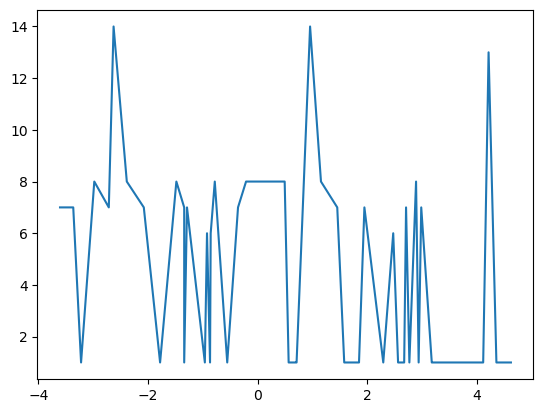

In [75]:
#Reducing the dimensionality and then plotting to view probable clusters
customer_pb_dummies = pd.get_dummies(customer_pb.iloc[:,1:], drop_first=True, dtype=int)
print(customer_pb_dummies.head())
scaler_customer_pb_dummies = StandardScaler()
customer_pb_dummies_scaled = pd.DataFrame(scaler_customer_pb_dummies.fit_transform(customer_pb_dummies))
customer_pb_dummies_scaled.columns = customer_pb_dummies.columns
print(customer_pb_dummies_scaled.head())
pca_standard_customer_pb = PCA(n_components=3)
customer_pb_after_pca = pca_standard_customer_pb.fit_transform(customer_pb_dummies_scaled[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']])
customer_pb_after_pca = pd.DataFrame(customer_pb_after_pca)
customer_pb_after_pca.columns = ['PC1', 'PC2', 'PC3']
print(customer_pb_after_pca.head())
print(pd.DataFrame(pca_standard_customer_pb.explained_variance_ratio_).transpose())
x, y = np.unique(customer_pb_after_pca.PC1, return_counts=True)
plt.plot(x, y)
plt.show()

In [77]:
# Checking if there is correlation with dummy region variables
print(customer_pb_dummies.corr())

                         age  annual_income  purchase_amount  loyalty_score  \
age                 1.000000       0.974833         0.986140       0.981835   
annual_income       0.974833       1.000000         0.984208       0.984351   
purchase_amount     0.986140       0.984208         1.000000       0.994147   
loyalty_score       0.981835       0.984351         0.994147       1.000000   
purchase_frequency  0.980532       0.982920         0.993579       0.986990   
region_North       -0.323050      -0.268066        -0.334926      -0.342182   
region_South       -0.050134      -0.099745        -0.043284      -0.024868   
region_West         0.414745       0.408519         0.420059       0.407836   

                    purchase_frequency  region_North  region_South  \
age                           0.980532     -0.323050     -0.050134   
annual_income                 0.982920     -0.268066     -0.099745   
purchase_amount               0.993579     -0.334926     -0.043284   
loyalty_

In [79]:
# Separating data into dependent and independent variables and performing dimensionality reduction on highly correlated independent variables
purchase_amount = customer_pb_dummies['purchase_amount']
ind_vars_purchase_amount = customer_pb_dummies[['age', 'annual_income', 'purchase_frequency', 'region_North', 'region_South', 'region_West']]
uncorrelated_var = ind_vars_purchase_amount[['region_North', 'region_South', 'region_West']]
cor_vars_purchase_amount = ind_vars_purchase_amount[['age', 'annual_income', 'purchase_frequency']]
scaler_cor_vars_purchase_amount = StandardScaler()
cor_vars_purchase_amount_scaled = scaler_cor_vars_purchase_amount.fit_transform(cor_vars_purchase_amount)
pca_cor_vars_purchase_amount = PCA()
cor_vars_purchase_amount_pca = pd.DataFrame(pca_cor_vars_purchase_amount.fit_transform(cor_vars_purchase_amount_scaled))
cor_vars_purchase_amount_pca.columns = ['PC1', 'PC2', 'PC3']
print(pd.DataFrame(pca_cor_vars_purchase_amount.explained_variance_ratio_).transpose())
ind_vars_purchase_amount_final = uncorrelated_var.merge(cor_vars_purchase_amount_pca['PC1'], right_index=True, left_index=True)
print(len(ind_vars_purchase_amount_final))
print(len(purchase_amount))

          0         1         2
0  0.986287  0.008456  0.005257
238
238


In [81]:
# Building model to predict purchase amount and fitting it on data
ind_vars_purchase_amount_train, ind_vars_purchase_amount_test, purchase_amount_train, purchase_amount_test = train_test_split(ind_vars_purchase_amount_final, purchase_amount,test_size=0.15, random_state = 20)
model_purchase_amount = LinearRegression()
model_purchase_amount.fit(ind_vars_purchase_amount_train, purchase_amount_train)

LinearRegression()

184.20846622349617
177.88289016261197


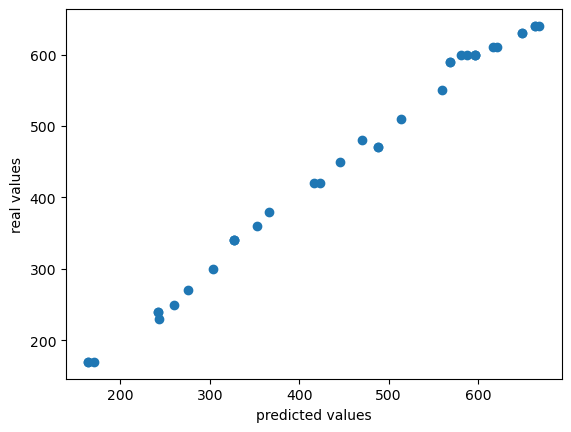

In [83]:
# Analyzing model performance
predictions_purchase_amount_train = model_purchase_amount.predict(ind_vars_purchase_amount_train)
print(mean_squared_error(predictions_purchase_amount_train, purchase_amount_train))
predictions_purchase_amount_test = model_purchase_amount.predict(ind_vars_purchase_amount_test)
print(mean_squared_error(predictions_purchase_amount_test, purchase_amount_test))
plt.scatter(predictions_purchase_amount_test, purchase_amount_test)
plt.xlabel('predicted values')
plt.ylabel('real values')
plt.show()

In [85]:
# Checking model parameters
print(model_purchase_amount.feature_names_in_)
print(model_purchase_amount.coef_)
print(model_purchase_amount.intercept_)

['region_North' 'region_South' 'region_West' 'PC1']
[ -1.19262023  10.49569274   6.03938577 -80.64116654]
420.8940967930274


In [87]:
# Preprocessing Data before building model to predict Purchase Frequency
purchase_frequency = customer_pb_dummies['purchase_frequency']
ind_vars_purchase_frequency = customer_pb_dummies[['age', 'annual_income', 'purchase_amount', 'region_North', 'region_South', 'region_West']]
cor_vars_purchase_frequency = ind_vars_purchase_frequency[['age', 'annual_income', 'purchase_amount']]
scaler_cor_vars_purchase_frequency = StandardScaler()
cor_vars_purchase_frequency_scaled = scaler_cor_vars_purchase_frequency.fit_transform(cor_vars_purchase_frequency)
pca_cor_vars_purchase_frequency = PCA()
cor_vars_purchase_frequency_pca = pd.DataFrame(pca_cor_vars_purchase_frequency.fit_transform(cor_vars_purchase_frequency_scaled))
cor_vars_purchase_frequency_pca.columns = ['PC1', 'PC2', 'PC3']
print(pd.DataFrame(pca_cor_vars_purchase_frequency.explained_variance_ratio_).transpose())
ind_vars_purchase_frequency_final = uncorrelated_var.merge(cor_vars_purchase_frequency_pca['PC1'], right_index=True, left_index=True)
print(len(ind_vars_purchase_frequency_final))
print(len(purchase_frequency))

          0         1        2
0  0.987821  0.008419  0.00376
238
238


In [89]:
# Building model to predict purchase frequency and fitting it on data
ind_vars_purchase_frequency_train, ind_vars_purchase_frequency_test, purchase_frequency_train, purchase_frequency_test = train_test_split(ind_vars_purchase_frequency_final, purchase_frequency,test_size=0.15, random_state = 30)
model_purchase_frequency = LinearRegression()
model_purchase_frequency.fit(ind_vars_purchase_frequency_train, purchase_frequency_train)

LinearRegression()

0.342222996520754
0.26993452348853747


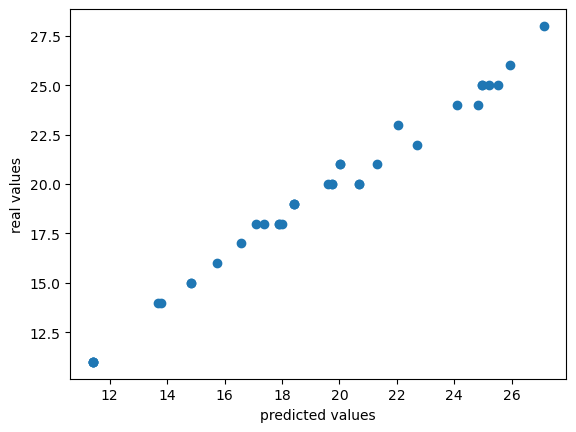

In [91]:
# Analyzing model performance
predictions_purchase_frequency_train = model_purchase_frequency.predict(ind_vars_purchase_frequency_train)
print(mean_squared_error(predictions_purchase_frequency_train, purchase_frequency_train))
predictions_purchase_frequency_test = model_purchase_frequency.predict(ind_vars_purchase_frequency_test)
print(mean_squared_error(predictions_purchase_frequency_test, purchase_frequency_test))
plt.scatter(predictions_purchase_frequency_test, purchase_frequency_test)
plt.xlabel('predicted values')
plt.ylabel('real values')
plt.show()

In [93]:
# Checking model parameters
print(model_purchase_frequency.feature_names_in_)
print(model_purchase_frequency.coef_)
print(model_purchase_frequency.intercept_)

['region_North' 'region_South' 'region_West' 'PC1']
[-0.45599332 -0.16203842 -0.18560901 -2.60357425]
20.04256685302444


In [95]:
# Preprocessing Data before building model to predict Loyalty Score
loyalty_score = customer_pb_dummies['loyalty_score']
ind_vars_loyalty_score = customer_pb_dummies[['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_North', 'region_South', 'region_West']]
cor_vars_loyalty_score = ind_vars_loyalty_score[['age', 'annual_income', 'purchase_amount', 'purchase_frequency']]
scaler_cor_vars_loyalty_score = StandardScaler()
cor_vars_loyalty_score_scaled = scaler_cor_vars_loyalty_score.fit_transform(cor_vars_loyalty_score)
pca_cor_vars_loyalty_score = PCA()
cor_vars_loyalty_score_pca = pd.DataFrame(pca_cor_vars_loyalty_score.fit_transform(cor_vars_loyalty_score_scaled))
cor_vars_loyalty_score_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(pd.DataFrame(pca_cor_vars_loyalty_score.explained_variance_ratio_).transpose())
ind_vars_loyalty_score_final = uncorrelated_var.merge(cor_vars_loyalty_score_pca['PC1'], right_index=True, left_index=True)
print(len(ind_vars_loyalty_score_final))
print(len(loyalty_score))

          0         1        2         3
0  0.987783  0.006359  0.00444  0.001418
238
238


In [97]:
# Building model to predict loyalty score and fitting it on data
ind_vars_loyalty_score_train, ind_vars_loyalty_score_test, loyalty_score_train, loyalty_score_test = train_test_split(ind_vars_loyalty_score_final, loyalty_score,test_size=0.15, random_state=40)
model_loyalty_score = LinearRegression()
model_loyalty_score.fit(ind_vars_loyalty_score_train, loyalty_score_train)

LinearRegression()

0.04220438069778271
0.0639983581769145


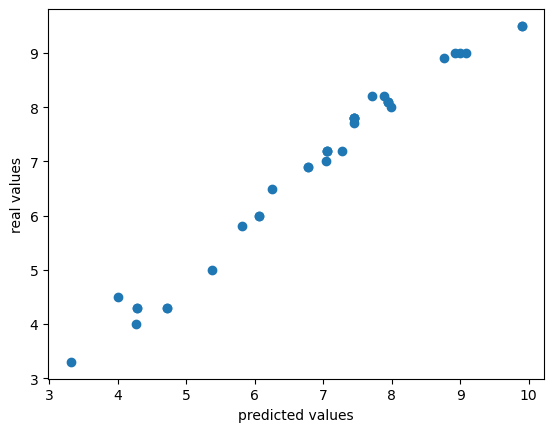

In [99]:
# Analyzing model performance
predictions_loyalty_score_train = model_loyalty_score.predict(ind_vars_loyalty_score_train)
print(mean_squared_error(predictions_loyalty_score_train, loyalty_score_train))
predictions_loyalty_score_test = model_loyalty_score.predict(ind_vars_loyalty_score_test)
print(mean_squared_error(predictions_loyalty_score_test, loyalty_score_test))
plt.scatter(predictions_loyalty_score_test, loyalty_score_test)
plt.xlabel('predicted values')
plt.ylabel('real values')
plt.show()

In [101]:
# Checking model parameters
print(model_loyalty_score.feature_names_in_)
print(model_loyalty_score.coef_)
print(model_loyalty_score.intercept_)

['region_North' 'region_South' 'region_West' 'PC1']
[-0.0874689   0.08383818 -0.01628391 -0.94083018]
6.792691632401878


C:\Users\antme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

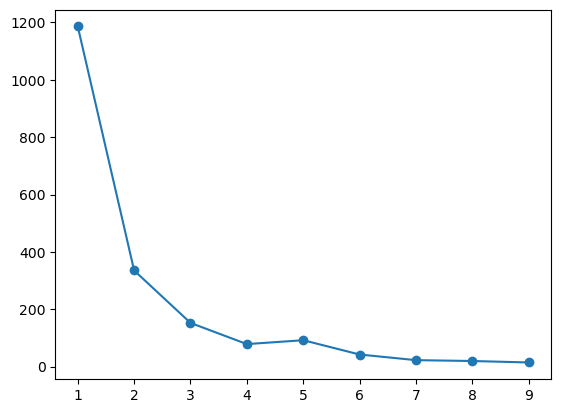

In [103]:
# Checking the ideal nmber of clusters in dataset
cluster_inertias = []
for i in range(1, 10):
    model_kmeans = KMeans(n_clusters=i)
    model_kmeans.fit(customer_pb_after_pca)
    cluster_inertias.append(model_kmeans.inertia_)

num_clusters = list(range(1, 10))
plt.plot(num_clusters, cluster_inertias, '-o')
plt.show()

In [105]:
# Building and fitting KMeans Cluster Model
model_kmeans_final = KMeans(n_clusters=3)
model_kmeans_final.fit(customer_pb_after_pca)

C:\Users\antme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [107]:
# Creating function to predict Purchase amount given age, annual income, purchase frequency and region
def predict_purchase_amount(age, annual_income, purchase_freq, region):
    if region.lower() == 'east':
        region_North = 0
        region_South = 0
        region_West = 0
    elif region.lower() == 'north':
        region_North = 1
        region_South = 0
        region_West = 0
    elif region.lower() == 'south':
        region_North = 0
        region_South = 1
        region_West = 0
    elif region.lower() == 'west':
        region_North = 0
        region_South = 0
        region_West = 1
    else:
        print('Invalid Region')
    scaled_num_variables = scaler_cor_vars_purchase_amount.transform([[age, annual_income, purchase_freq]])
    pca_vars = pca_cor_vars_purchase_amount.transform(scaled_num_variables)
    fin_var = [region_North, region_South, region_West, pca_vars[0][0]]
    return model_purchase_amount.predict([fin_var])
    

In [109]:
# Testing function
print(predict_purchase_amount(30, 100000, 24, 'South'))

[605.3729842]


C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [111]:
# Creating function to predict Purchase frequency given age, annual income, purchase amount and region
def predict_purchase_frequency(age, annual_income, purchase_amount, region):
    if region.lower() == 'east':
        region_North = 0
        region_South = 0
        region_West = 0
    elif region.lower() == 'north':
        region_North = 1
        region_South = 0
        region_West = 0
    elif region.lower() == 'south':
        region_North = 0
        region_South = 1
        region_West = 0
    elif region.lower() == 'west':
        region_North = 0
        region_South = 0
        region_West = 1
    else:
        print('Invalid Region')
    scaled_num_variables = scaler_cor_vars_purchase_frequency.transform([[age, annual_income, purchase_amount]])
    pca_vars = pca_cor_vars_purchase_frequency.transform(scaled_num_variables)
    fin_var = [region_North, region_South, region_West, pca_vars[0][0]]
    return model_purchase_frequency.predict([fin_var])

In [113]:
# Testing function
print(predict_purchase_frequency(30, 100000, 605, 'SOUTH'))

[26.03538647]


C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [115]:
# Creating function to predict loyalty score given age, annual income,purchase amount, purchase frequency and region
def predict_loyalty_score(age, annual_income, purchase_amount, purchase_frequency, region):
    if region.lower() == 'east':
        region_North = 0
        region_South = 0
        region_West = 0
    elif region.lower() == 'north':
        region_North = 1
        region_South = 0
        region_West = 0
    elif region.lower() == 'south':
        region_North = 0
        region_South = 1
        region_West = 0
    elif region.lower() == 'west':
        region_North = 0
        region_South = 0
        region_West = 1
    else:
        print('Invalid Region')
    scaled_num_variables = scaler_cor_vars_loyalty_score.transform([[age, annual_income, purchase_amount, purchase_frequency]])
    pca_vars = pca_cor_vars_loyalty_score.transform(scaled_num_variables)
    fin_var = [region_North, region_South, region_West, pca_vars[0][0]]
    return model_loyalty_score.predict([fin_var])

In [117]:
# Testing function
print(predict_loyalty_score(20, 100000, 450, 20, 'SoUTh'))

[7.79703969]


C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\antme\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
